In [1]:
from sdfray.light import DistantLight,PointLight,AmbientLight
from sdfray.scene import Scene,Camera
from sdfray.geom import Union,Intersection,Subtraction
from sdfray.shapes import Sphere,Box,Cylinder,Plane
from sdfray.surface import UniformSurface,SurfaceProp,CheckerSurface
from sdfray.util import *

import numpy as np

In [2]:
lights = [
    PointLight([10,0,0],[2,2.5,-2]),
    PointLight([0,10,0],[-2,2.5,0]),
    DistantLight([0,0,1.5],[2,2.5,2]),
    AmbientLight([0.1,0.1,0.1])
]

In [3]:
s = Scene(Sphere(),lights)

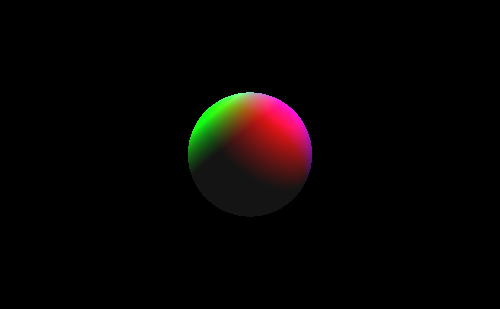

In [4]:
s.render()

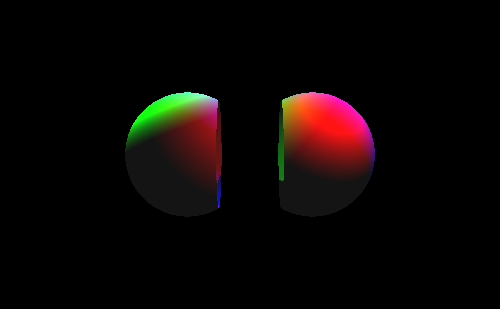

In [5]:
sdf = Subtraction(Union(Sphere(translate=[1,0,0]),Sphere(translate=[-1,0,0])),Sphere())

Scene(sdf,lights).render()

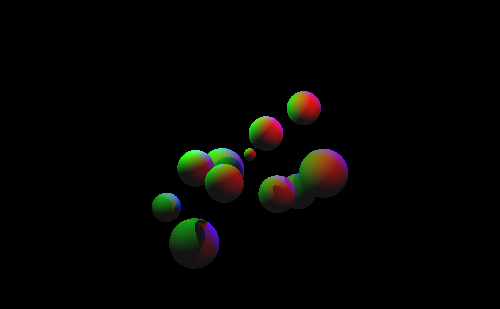

In [6]:
sdf = Sphere(radius=0.1)
for i in range(10):
    sdf = Union(sdf,Sphere(radius=np.random.random()*0.25+0.25,translate=np.random.normal(0,1,3)))
    
Scene(sdf,lights).render()

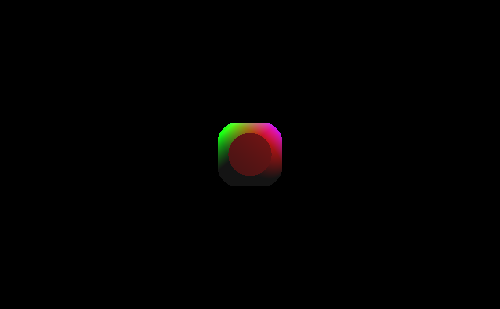

In [7]:
cut_z = Cylinder(height=2,radius=0.25)
cut_x = Cylinder(height=2,radius=0.25,rotate=[np.pi/2,0,0])
cut_y = Cylinder(height=2,radius=0.25,rotate=[0,np.pi/2,0])
box_sphere = Intersection(Box(),Sphere(radius=0.6))
sdf = Subtraction(Subtraction(Subtraction(box_sphere,cut_x),cut_y),cut_z)

Scene(sdf,lights).render()

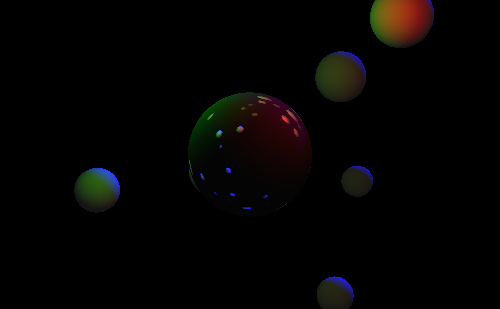

In [8]:
glossy_boi = SurfaceProp(diffuse=0.15,specular=0.85)

sdf = Sphere(radius=1.0,surface=UniformSurface(glossy_boi))
for i in range(25):
    sdf = Union(sdf,Sphere(radius=np.random.random()*0.2+0.5,translate=np.random.normal(0,5,3)))
    
Scene(sdf,lights).render()

In [9]:
demo_lights = [
    DistantLight([5,0,0],[1,1,-2]),
    DistantLight([0,5,0],[-1,1,-2]),
    DistantLight([0,0,5],[1,1,2])
]

glossy = SurfaceProp(diffuse=0.05,specular=0.85)
sdf = Sphere(radius=1.0,surface=UniformSurface(glossy))
demo_sdf = Union(sdf,Plane(surface=CheckerSurface()))

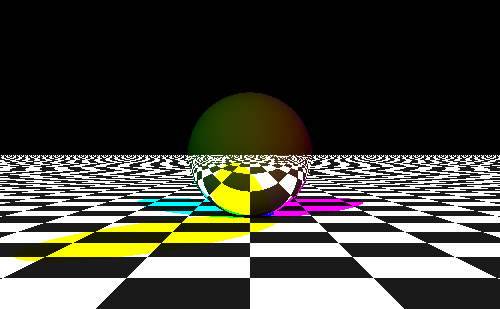

In [10]:
Scene(demo_sdf,demo_lights).render()

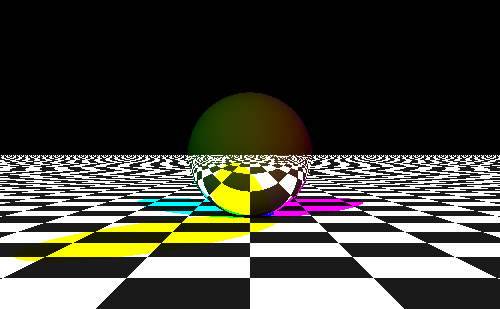

In [11]:
Scene(demo_sdf,demo_lights).render(antialias=8)

In [12]:
point_lights = [
    PointLight([50,0,0],[2,2.5,-2]),
    PointLight([0,50,0],[-2,2.5,0]),
    PointLight([0,0,50],[2,2.5,2])
]

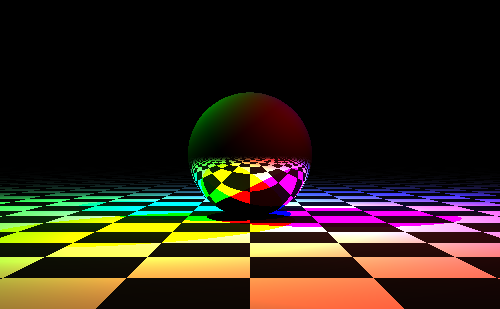

In [13]:
Scene(demo_sdf,point_lights).render(antialias=8)

In [14]:
surf = UniformSurface(SurfaceProp(diffuse=0.3,specular=0.6))

#sdf = Subtraction(Box(translate=[0,0,1]),Sphere(),surface=surf)
sdf = Subtraction(Box(translate=[0,0,1],width=2,depth=2,height=2),Cylinder(height=3,radius=1),surface=surf,rotate=[0,0.2,0])

sdf_caustic = Union(sdf,Plane(anchor=A([0,-1,0]),surface=CheckerSurface()))

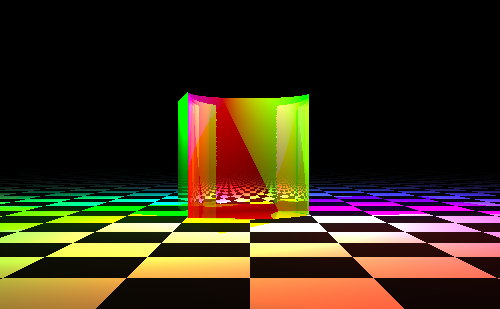

In [15]:
Scene(sdf_caustic,point_lights).render()

In [16]:
super_demo_lights = [
    PointLight([25,0,0],[2,2.5,-2]),
    PointLight([0,25,0],[-2,2.5,0]),
    PointLight([0,0,25],[2,2.5,2])
]

sdf = Sphere(translate=[0,-0.2,0],radius=0.7,surface=UniformSurface(SurfaceProp(diffuse=0.5,specular=0.5)))
sdf = Union(Box(translate=[-1.5,-0.2,0],depth=1.4,height=1.4,width=1.4,surface=UniformSurface(SurfaceProp(diffuse=0.9,specular=0.1))),sdf)
sdf = Union(Cylinder(translate=[1.5,-0.2,0.],radius=0.7,height=1.4,surface=UniformSurface(SurfaceProp(diffuse=0.1,specular=0.9))),sdf)
        
super_demo_sdf = Union(sdf,Plane(anchor=[0,-1,0],surface=CheckerSurface(checker_size=0.25)))

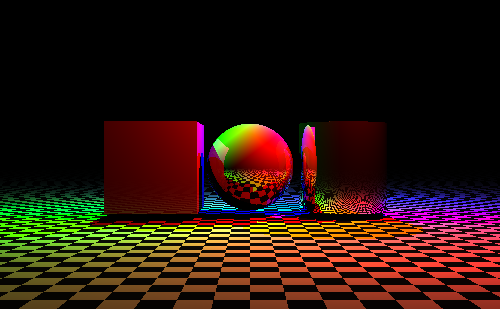

In [17]:
Scene(super_demo_sdf,super_demo_lights).render()

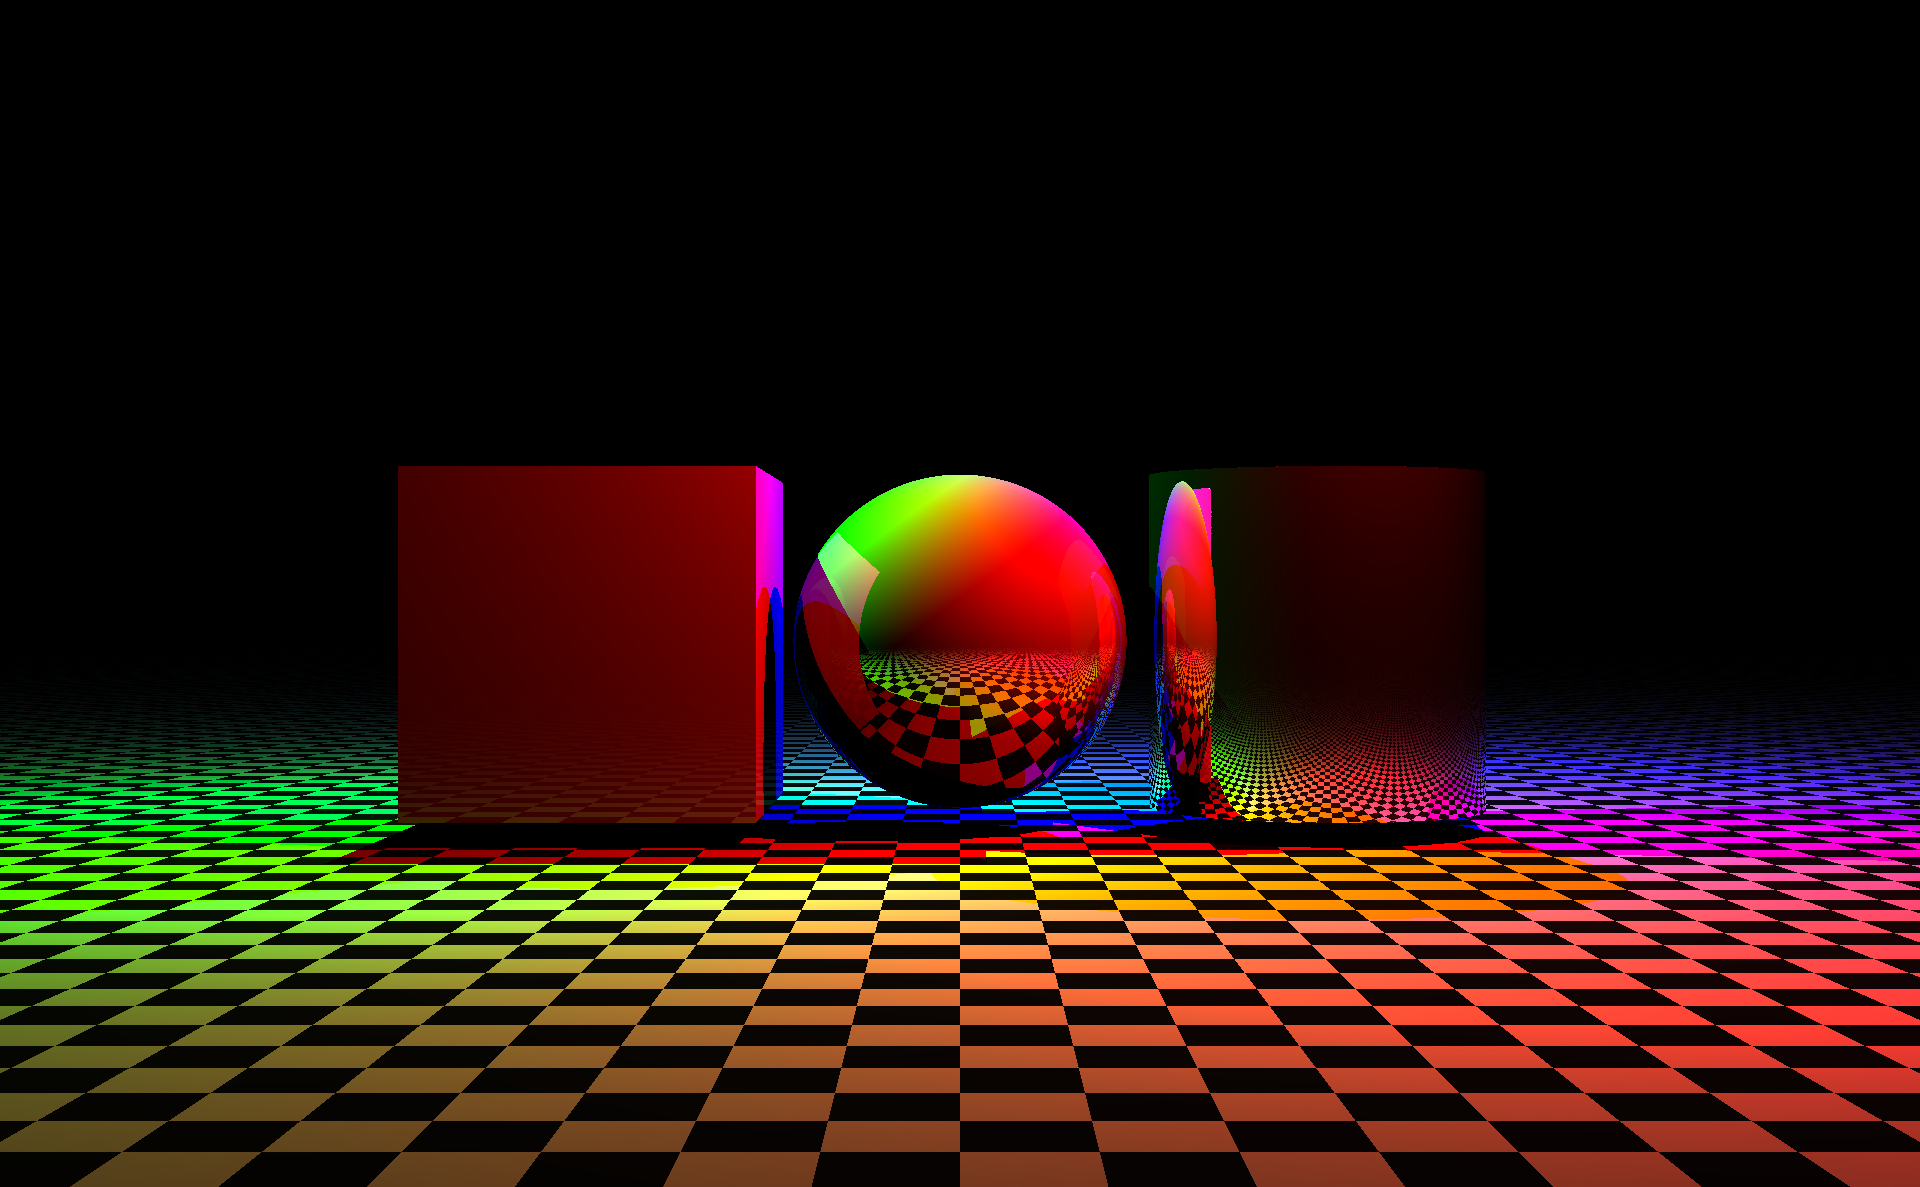

In [18]:
Scene(super_demo_sdf,super_demo_lights,cam=Camera(width_px=1920)).render()

In [19]:
mega_demo_lights = [
    PointLight([25,0,0],[2,2.5,-2]),
    PointLight([0,25,0],[-2,2.5,0]),
    PointLight([0,0,25],[2,2.5,2])
]

sdf = Sphere(translate=[0,-0.2,0],radius=0.7,surface=UniformSurface(SurfaceProp(diffuse=0.05,specular=0.05,transmit=0.9,refractive_index=1.4)))
sdf = Union(Box(translate=[-1.5,-0.2,0],depth=1.4,height=1.4,width=1.4,surface=UniformSurface(SurfaceProp(diffuse=0.9,specular=0.1))),sdf)
sdf = Union(Cylinder(translate=[1.5,-0.2,0],radius=0.7,height=1.4,surface=UniformSurface(SurfaceProp(diffuse=0.1,specular=0.9))),sdf)

mega_demo_sdf = Union(sdf,Plane(anchor=[0,-1,0],surface=CheckerSurface(checker_size=0.25)))

In [20]:
print(Scene(mega_demo_sdf,lights=mega_demo_lights,cam=Camera(width_px=1920)).glsl())


//Autogenerated by sdfray

#ifdef GL_ES
precision highp float;
#endif

uniform vec2 u_resolution;
uniform vec2 u_mouse;
uniform float u_time;

struct Property {
    float diffuse, specular, transmit, refractive_index;
    vec3 color, emittance;
};

struct GeoInfo {
    float sdf;
    Property prop;
};

GeoInfo wrap(float sdf, Property prop) {
    return GeoInfo(sdf,prop);
}

GeoInfo wrap(GeoInfo info, Property prop) {
    return GeoInfo(info.sdf,prop);
}


float join(float a, float b) {
    return min(a,b);
}

GeoInfo join(GeoInfo a, GeoInfo b) {
    if (a.sdf < b.sdf) {
        return a;
    } else {
        return b;
    }
}
    
float cylinder(vec3 p, vec3 tx, mat3 rot, float height, float radius) {
    p = rot*(p-tx);
    float a = length(p.xz)-radius;
    float b = abs(p.y)-height/2.;
    return min(max(a,b),0.) + length(vec2(max(a,0.),max(b,0.)));
}
    
const Property var_11377718 = Property(0.1,0.9,0.0,1.0,vec3(1.0,1.0,1.0),vec3(0.0,0.0,0.0));
        
Property uniform_surf(ve

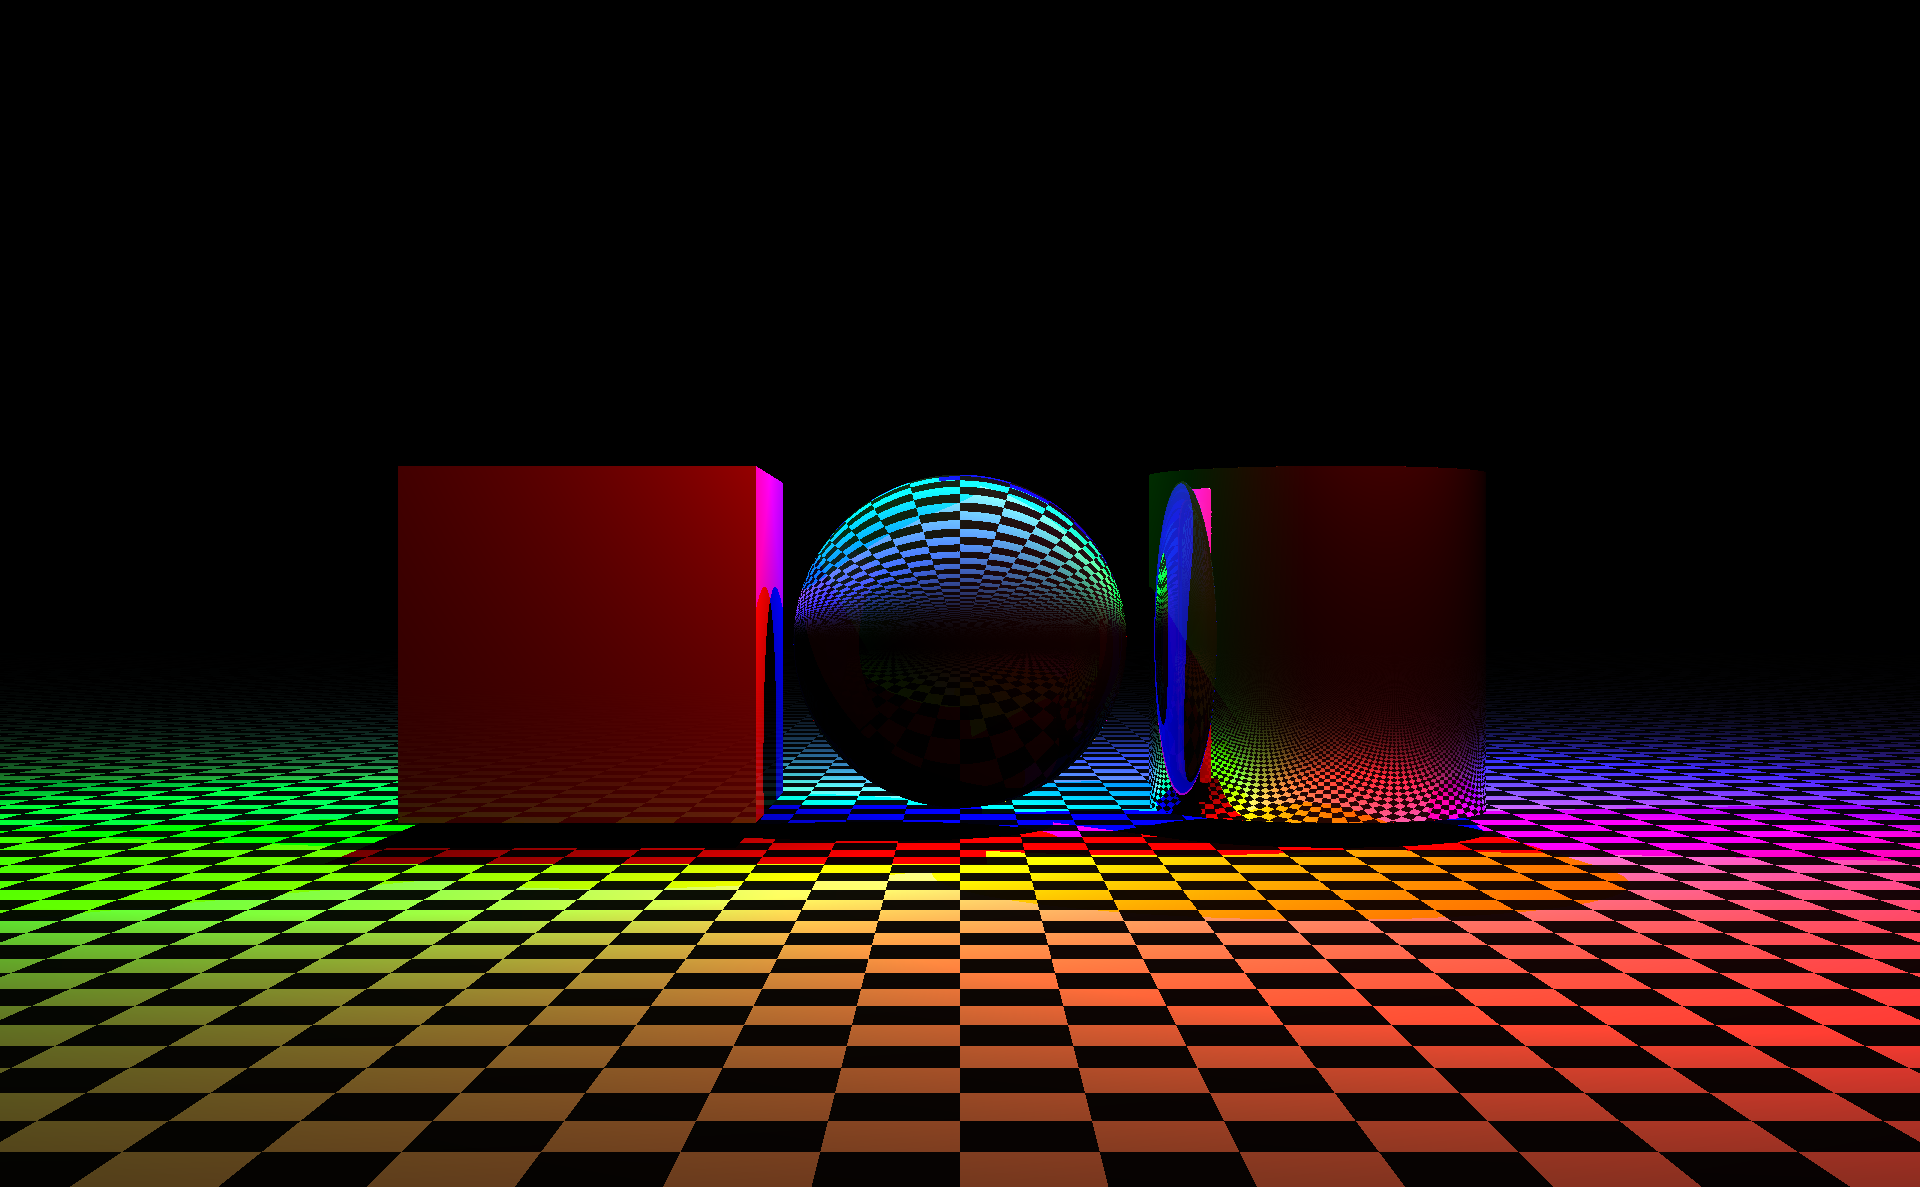

In [21]:
Scene(mega_demo_sdf,lights=mega_demo_lights,cam=Camera(width_px=1920)).render()

In [22]:
sdf = Sphere(translate=[0,0,0],radius=0.7,surface=UniformSurface(SurfaceProp(diffuse=0.05,specular=0.05,transmit=0.9,refractive_index=1.4)))
sdf = Union(Sphere(translate=[-1.5,0,0],radius=0.7,surface=UniformSurface(SurfaceProp(diffuse=0.7,specular=0.05))),sdf)
sdf = Union(Sphere(translate=[1.5,0,0],radius=0.7,surface=UniformSurface(SurfaceProp(diffuse=0.05,specular=0.9))),sdf)

lols_demo_sdf = Union(sdf,Plane(anchor=[0,-1,0],surface=CheckerSurface(checker_size=0.25)))

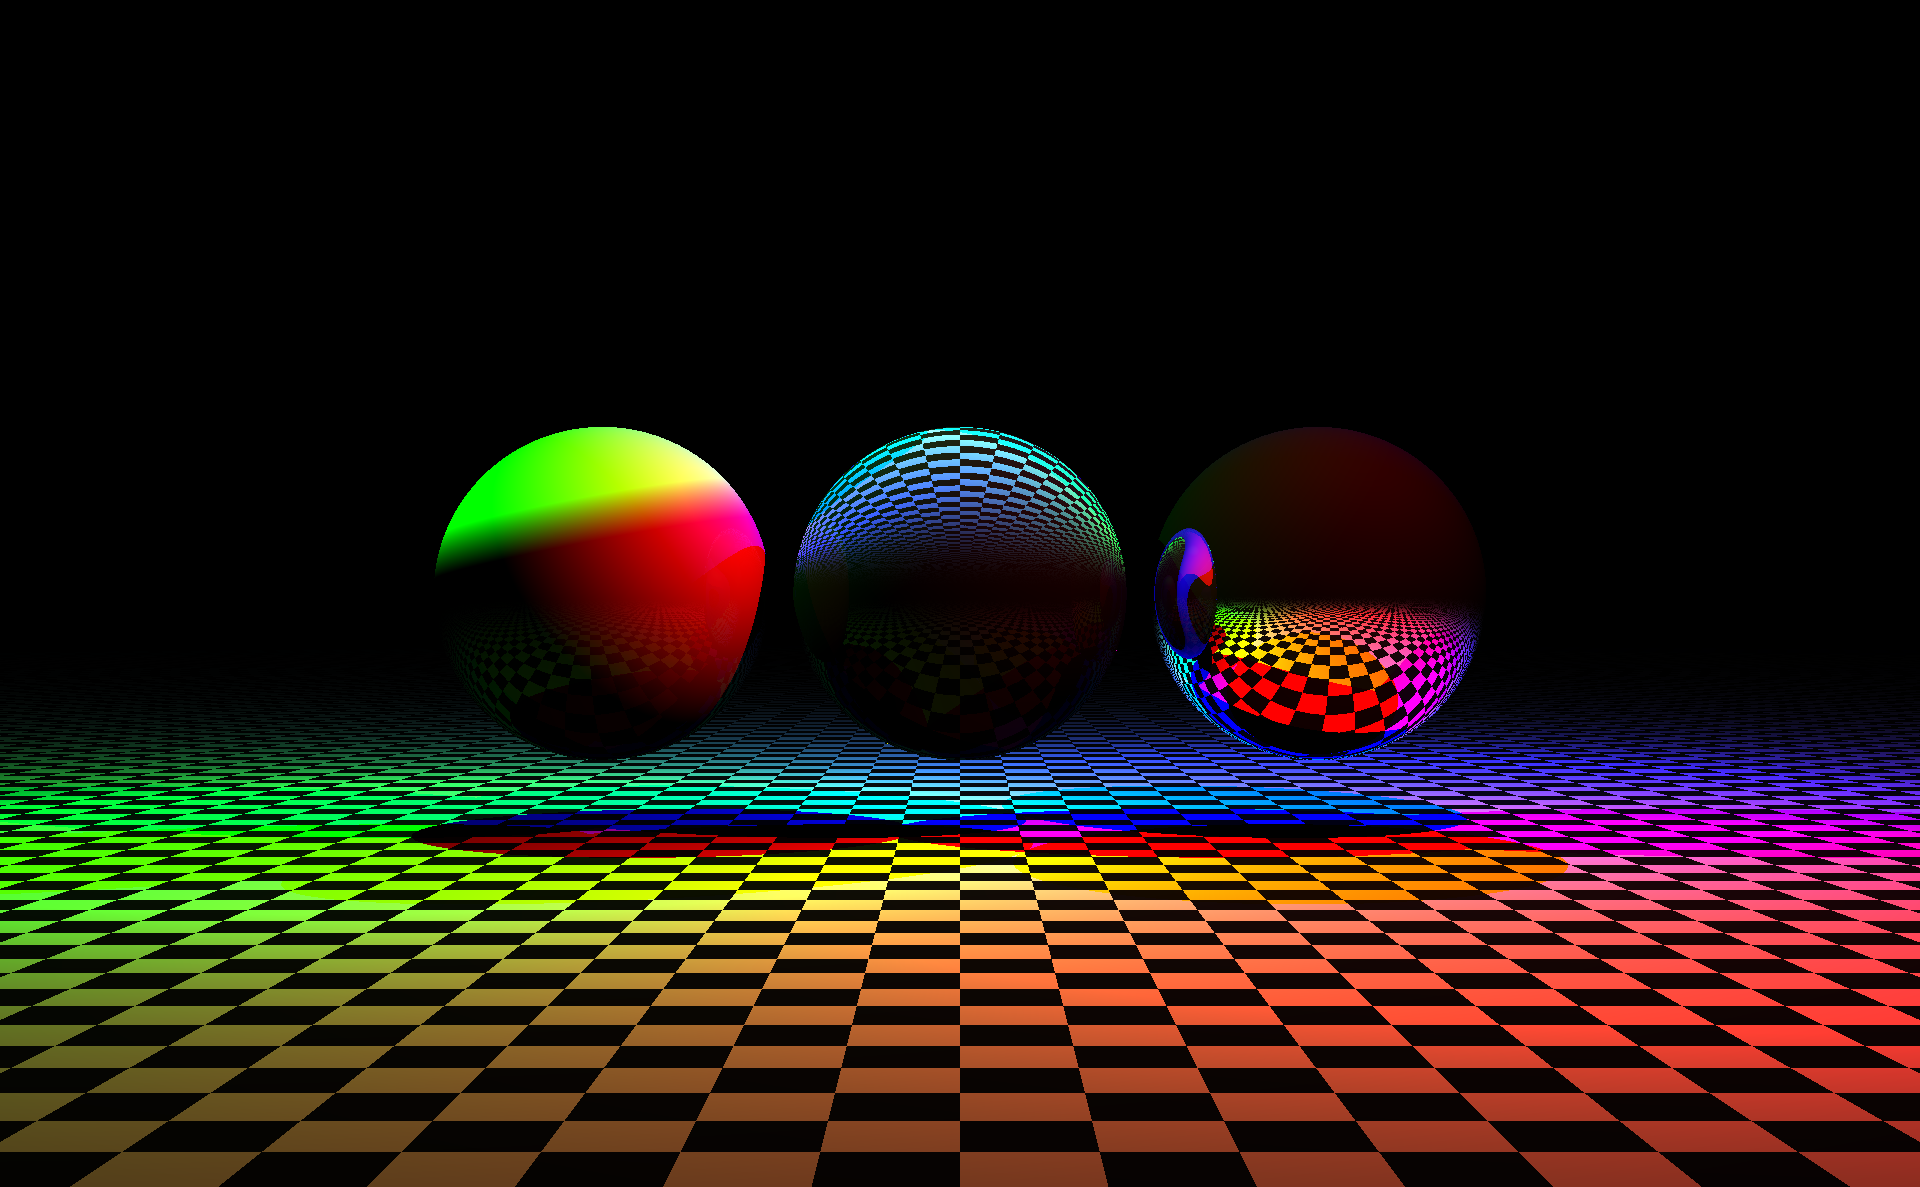

In [23]:
Scene(lols_demo_sdf,lights=mega_demo_lights,cam=Camera(width_px=1920)).render()

In [24]:
clear = UniformSurface(SurfaceProp(diffuse=0.05,specular=0.05,transmit=0.9,refractive_index=1.4))

sdf = Sphere(translate=[0,-0.2,0],radius=0.7,surface=glossy)
sdf = Union(Box(translate=[-1.5,-0.2,0],depth=1.4,height=1.4,width=1.4,surface=clear),sdf)
sdf = Union(Cylinder(translate=[1.5,-0.2,0],radius=0.7,height=1.4,surface=clear),sdf)


clear_demo_sdf = Union(sdf,Plane(anchor=[0,-1,0],surface=CheckerSurface(checker_size=0.25)))

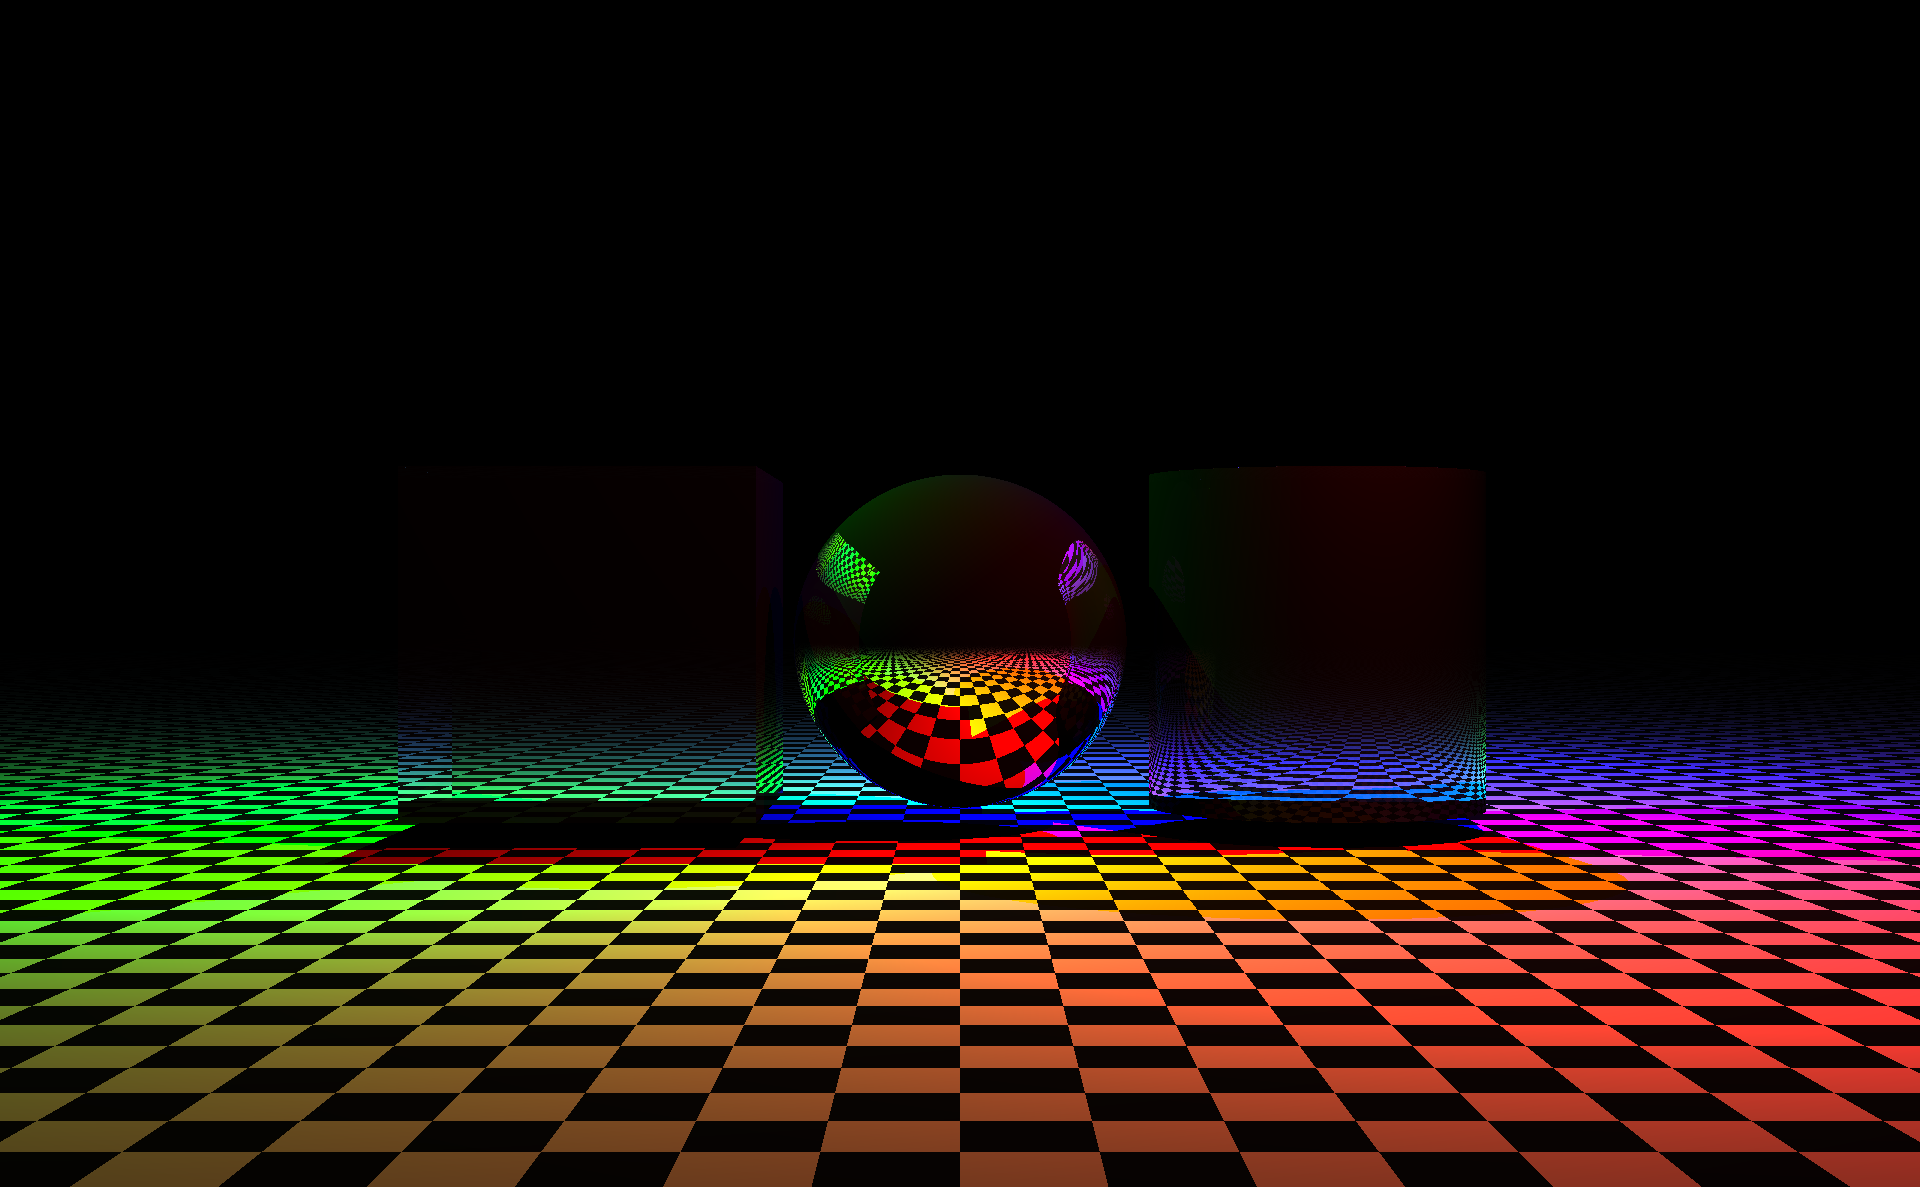

In [25]:
Scene(clear_demo_sdf,lights=mega_demo_lights,cam=Camera(width_px=1920)).render()